In [1]:
import ttvfast

In [2]:
from ttvfast.models import Planet 

In [103]:
from astropy.constants import M_sun, M_earth

midtransit_f = 2455422.710
midtransit_e = 2454983.404
period_f = 267.291
period_e = 122.3874

In [223]:
phase = 360 * (((midtransit_e - midtransit_f)/period_f) % 1 )

In [224]:
mass_e = 4.45356410231 * float(M_earth/M_sun) # Forecaster (Berger 2018, Chen+ 2017)
mass_f = 3.33116078749 * float(M_earth/M_sun) # Forecaster (Berger 2018, Chen+ 2017)

e = Planet(mass=mass_e, period=period_e, eccentricity=0, inclination=89.98, 
           longnode=90, argument=90, mean_anomaly=0)
f = Planet(mass=mass_f, period=period_f, eccentricity=0, inclination=89.90, 
           longnode=90, argument=90, mean_anomaly=phase)

The function ttvfast.ttvfast returns a dictionary containing positions and rv. The positions entry is a tuple of:

* a list of integer indices for which values correspond to which planet,

* a list of integers defining the epoch,

* a list of times,

* a list of rsky values, and

* a list of vsky values.

In [230]:
from ttvfast import ttvfast

result = ttvfast(planets=[e, f], stellar_mass=0.69, time=midtransit_e, dt=period_e/50, total=midtransit_e+4000)

### README:
 (2) time step for the integration: SHOULD NOT BE LARGER THAN  ~ 1/20 of the SHORTEST ORBITAL PERIOD. *Large eccentricities will likely require smaller steps* UNIT: days
 
(3) t0, the reference time at which integration starts. UNIT: days

(4) tfinal, the end point of integration (such that tfinal-t0 = observation time span). Again, in units of DAYS.

In [231]:
import numpy as np
planet_ind, epoch, times, rsky, vsky = [np.array(i) for i in result['positions']]
planet_ind, epoch, times, rsky, vsky = [i[(times != -2)] for i in [planet_ind, epoch, times, rsky, vsky]]

In [232]:
# from astropy.table import Table

# Table([planet_ind, epoch, times, rsky, vsky], names="planet_ind, epoch, times, rsky, vsky".split(", "))

Text(0,0.5,'Transit time')

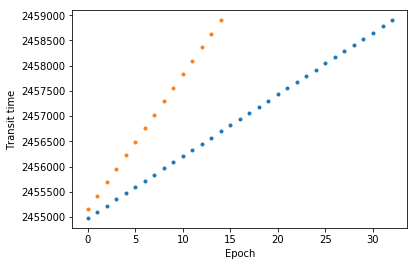

In [233]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(epoch[(planet_ind == 0)], times[(planet_ind == 0)], '.')
plt.plot(epoch[(planet_ind == 1)], times[(planet_ind == 1)], '.')
plt.xlabel('Epoch')
plt.ylabel('Transit time')

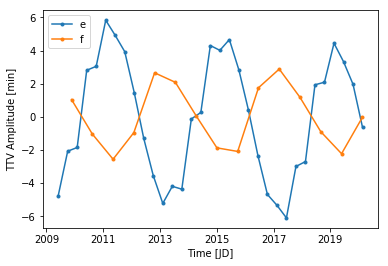

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.time import Time
efit = np.polyval(np.polyfit(epoch[(planet_ind == 0)], times[(planet_ind == 0)], 1), epoch[(planet_ind == 0)])
ffit = np.polyval(np.polyfit(epoch[(planet_ind == 1)], times[(planet_ind == 1)], 1), epoch[(planet_ind == 1)])

# plt.plot(epoch[(planet_ind == 0)], 24*60*(times[(planet_ind == 0)] - efit), '.-', label='e')
# plt.plot(epoch[(planet_ind == 1)], 24*60*(times[(planet_ind == 1)] - ffit), '.-', label='f')
# plt.xlabel('Epoch')
# plt.ylabel('TTV Amplitude [min]')
# plt.legend()


plt.plot_date(Time(times[(planet_ind == 0)], format='jd').plot_date, 24*60*(times[(planet_ind == 0)] - efit), '.-', label='e')
plt.plot_date(Time(times[(planet_ind == 1)], format='jd').plot_date, 24*60*(times[(planet_ind == 1)] - ffit), '.-', label='f')
plt.xlabel('Time [JD]')
plt.ylabel('TTV Amplitude [min]')
plt.legend()
# plt.savefig('ttvfast_demo.png', dpi=200, bbox_inches='tight')

In [221]:
from astropy.time import Time
Time.now().jd

2458428.467454462

In [222]:
np.save('example_times_e.npy', times[(planet_ind == 0)])
np.save('example_times_f.npy', times[(planet_ind == 1)])